- [x] 深拷贝与浅拷贝
- [x] 定义函数等基础语法
- [x] 拼音读数问题
- [x] 兔子问题

## 深拷贝和浅拷贝

In [138]:
# 深浅拷贝

import copy

arr0 = [1, 2, 3, [4, 5, 6, [7, 8]]]
arr1 = copy.copy(arr0)
arr2 = arr0
arr3 = copy.deepcopy(arr0)

# 数组直接赋值就是引用，所有更改互相影响
# 浅复制只有第一层是复制
# 但如果第一层有元素已经是可变对象（数组，字典等），那么这些对象也没有被复制
arr0[0] = 100    # won't affect arr1, arr2
arr1[1] = 200    # won't affect arr0, arr2
arr2[2] = 300    # will affect arr0, arr1
arr0[3][0] = "A" # will affect arr0-2
arr1[3][1] = "B" # will affect arr0-2
arr2[3][2] = "C" # will affect arr0-2

# 深拷贝是每一个具体的值都会把“值”复制过来，与原对象与无关联
arr3[3][1] = "a" # won't affect arr0-2

print(f'''原数组:\tarr0 = {arr0}
浅拷贝:\tarr1 = {arr1}
赋值:\tarr2 = {arr2}
深拷贝:\tarr3 = {arr3}
''')

data = {"arr0": arr0, "arr1": arr1, "arr2": arr2, "arr3": arr3}

for k, v in data.items():
    print(k, id(v))
    for i in v:
        print(id(i))
    print()

原数组:	arr0 = [100, 2, 300, ['A', 'B', 'C', [7, 8]]]
浅拷贝:	arr1 = [1, 200, 3, ['A', 'B', 'C', [7, 8]]]
赋值:	arr2 = [100, 2, 300, ['A', 'B', 'C', [7, 8]]]
深拷贝:	arr3 = [1, 2, 3, [4, 'a', 6, [7, 8]]]

arr0 140332148845696
4420628176
4420625040
140332149433296
140332149443472

arr1 140332118592240
4420625008
4420631376
4420625072
140332149443472

arr2 140332148845696
4420628176
4420625040
140332149433296
140332149443472

arr3 140332119560512
4420625008
4420625040
4420625072
140332116972720



## 函数

改造昨天的作业为一个随机显示图片的函数

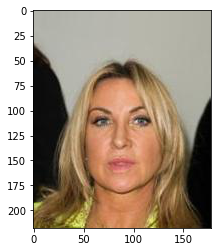

In [3]:
import os
import matplotlib.pyplot as plt
import random

def random_image(root_dir, id_path, img_dir):
    img_path = os.path.join(root_dir, img_dir)

    img_files = []
    with open(os.path.join(root_dir, id_path)) as f:
        img_files = [os.path.join(img_path,line[:-1]) for line in f.readlines()]


    random_index = random.randrange(0, len(img_files))
    img_path = img_files[random_index].split()[0]

    image = plt.imread(img_path)
    plt.imshow(image)
    plt.show()

random_image('./data/my_data', 'my_id.txt', 'my_img')

### 函数传参和可变参数

- 要传可变参数的话，即使有带默认值的固定位置参数，也是需要显式传值的
- `\*args`接到的时候是一个元组，
- `\*\*kwargs`接到的是一个字典
- 但你用元组和字典传参时，需要用星号分别来展开（元组一个星号，字典两个星号）
- 参数最终是一个个传入的，而不是包装成元组和字典

In [4]:
def demo(a, b="hello", c=5, *args, **kwargs):
    print(f'a={a}, b={b}, c={c}')
    if args:
        print(f'未命名可变参数有{len(args)}个：{args}')
    if kwargs:
        print(f'命名可变参数有{len(kwargs)}个：{kwargs}')
        
demo(1)
demo(2, c=3)
demo(3, b="world")
demo(4, 5, 6)
demo(5, 0, 0, "a", 12) # 演示命名参数即使带了默认值，也要传满才能传到可变参数去
demo(6, 1, 1, 'c', name="walker") # 演示传命名可变参数

t = ('a', 'b')
d = {'course': 'ai', 'fee': 35000}
# 演示以元组和字典的方式传可变参数 （即以*和**来展开）
demo(7, 2, 2, *t, **d)

a=1, b=hello, c=5
a=2, b=hello, c=3
a=3, b=world, c=5
a=4, b=5, c=6
a=5, b=0, c=0
未命名可变参数有2个：('a', 12)
a=6, b=1, c=1
未命名可变参数有1个：('c',)
命名可变参数有1个：{'name': 'walker'}
a=7, b=2, c=2
未命名可变参数有2个：('a', 'b')
命名可变参数有2个：{'course': 'ai', 'fee': 35000}


## 拼音读数问题

> 思路：一般会把数字转成字符串再拆成字符数组，遍历字符，转成数字再相加。这里换个思路，每次取出除以10的余数相加。

In [19]:
value, sum_v, py_dict = min(10**100, int(input('please input a number'))), 0, {"1":"yi", "2":"er", "3":"san", "4":"si", "5":"wu", "6":"liu", "7":"qi", "8":"ba", "9": "jiu", "0":"ling"}
while value: sum_v, value = sum_v + (value % 10), int(value/10)
print(f'output: {sum_v},', ' '.join([py_dict[key] for key in str(sum_v)]))

please input a number 2389471239809123849823932403495809234509


output: 177, yi qi qi


In [5]:

py_dict = {"1":"yi", "2":"er", "3":"san", "4":"si", "5":"wu", \
           "6":"liu", "7":"qi", "8":"ba", "9": "jiu", "0":"ling"}

value = random.randrange(1, 10**100)
sum_v = 0

print(f'input:\n{value}')
while value:
    sum_v += (value % 10)
    value = int(value/10)

py = ' '.join([py_dict[key] for key in str(sum_v)])
print(f'output: ({sum_v})\n{py}')

input:
7987515406018889512460878670435960668419015098376752786060087653285617848634027859460057946113058207
output: (384)
san ba si


In [15]:
value, sum_v, py_dict =int(input('please input a number')), 0, {"1":"yi", "2":"er", "3":"san", "4":"si", "5":"wu", "6":"liu", "7":"qi", "8":"ba", "9": "jiu", "0":"ling"}
while value: sum_v, value = sum_v + (value % 10), int(value/10)
print(f'output: {sum_v},', ' '.join([py_dict[key] for key in str(sum_v)]))

please input a number 45812345983123824123748978


output: 100, yi ling ling


## 兔子问题

有一只兔子，从出生后第三个月起每个月都生一只兔子，小兔子长到第三个月后每个月又生一只兔子，假如兔子都能存活，问每个月的兔子总数是多少？

> 思路：其实就是一只兔子一个月会生一只小兔子，加上边界控制（发育成熟需要两个月）即可。
> 所有小兔子生的兔子都加给母兔子。

In [1]:
def rabbit_reproduction(max_month):
    '''
    max_month: 需要生产的月数
    '''
    if not max_month:
        return
    month, count = 0, 1
    while month < max_month:
        if(month > 1):
            count += rabbit_reproduction(max_month-month)
        month += 1
    return count

[rabbit_reproduction(i) for i in range(1, 18)]

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597]